# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import seaborn as sns; 
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [53]:
# A = [ X[:, [0,1]], X[:, [2,3]], X[:,[0,2]], X[:, [1,3]] ]
A = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [7]:
models = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

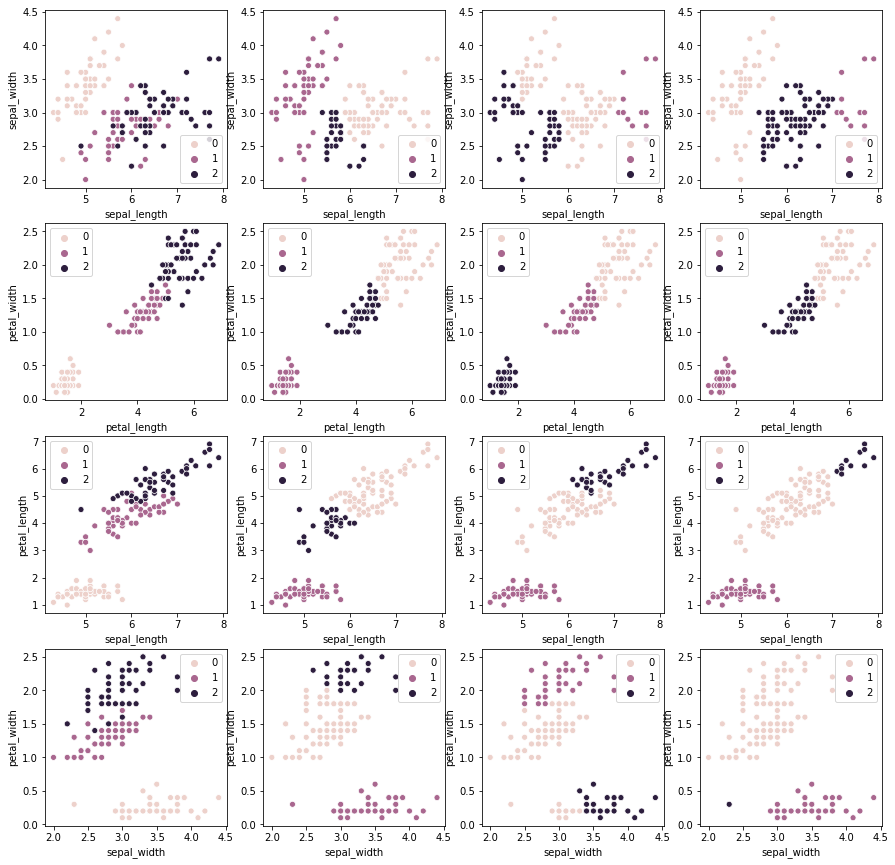

In [64]:
fig, ax = plt.subplots(4,4, figsize=(15,15))

sns.scatterplot(data=A, x='sepal_length', y='sepal_width', hue=y,  ax=ax[0,0]) 
sns.scatterplot(data=A, x='petal_length', y='petal_width', hue=y,  ax=ax[1,0])
sns.scatterplot(data=A, x='sepal_length', y='petal_length', hue=y,  ax=ax[2,0])
sns.scatterplot(data=A, x='sepal_width', y='petal_width', hue=y,  ax=ax[3,0])    

for i, (model_name, model) in enumerate(models):

    predict_y0  = model.fit_predict(A.iloc[:,[0,1]])
    sns.scatterplot(data=A, x='sepal_length', y='sepal_width', hue=predict_y0,  ax=ax[0,i+1])

    predict_y1  = model.fit_predict(A.iloc[:,[2,3]])
    sns.scatterplot(data=A, x='petal_length', y='petal_width', hue=predict_y1,  ax=ax[1,i+1])
    
    predict_y2  = model.fit_predict(A.iloc[:,[0,2]])
    sns.scatterplot(data=A, x='sepal_length', y='petal_length', hue=predict_y2,  ax=ax[2,i+1])
    
    predict_y3  = model.fit_predict(A.iloc[:,[1,3]])
    sns.scatterplot(data=A, x='sepal_width', y='petal_width', hue=predict_y3,  ax=ax[3,i+1])